# E-commerce site clients segmentation

# Content
- [Unpickling dataframes](#Unpickling-dataframes)
- [Automatic segmentation](#Automatic-segmentation)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

## Unpickling dataframe

After we pickled the dataframe, we have to unpickle it.

In [102]:
# To unpickle the dataframe

new_df_for_segmentation_analysis = pd.read_pickle("./pickle_data_automatic_segmentation.pkl")
rfm_new_df_for_automatic_segmentation = pd.read_pickle("./pickle_data_RFM_segmentation.pkl")

# rfm_df_heuristic_method = pd.read_pickle("./pickle_data_RFM_segmentation.pkl")

## Automatic segmentation

We will perform the customers segmentation by using unsupervised Machine Learning algorithms. For this we will create a new data frame that will contain the variables that we will potentially use for this.

In [103]:
automatic_segmentation_df = new_df_for_segmentation_analysis.copy()

In [104]:
automatic_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 115298
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    91231 non-null  object 
 1   review_score_for_a_customer_order     91231 non-null  float64
 2   number_of_items_for_a_customer        91231 non-null  float64
 3   number_of_orders_for_a_customer       91231 non-null  float64
 4   payment_value_for_a_customer_order    91231 non-null  float64
 5   appliances_products_per_customer      91231 non-null  float64
 6   arts_products_per_customer            91231 non-null  float64
 7   auto_products_per_customer            91231 non-null  float64
 8   construction_products_per_customer    91231 non-null  float64
 9   electronics_products_per_customer     91231 non-null  float64
 10  fashion_products_per_customer         91231 non-null  float64
 11  food_drinks_pr

We will eliminate information containing some identifiers such as the product and order. We will eliminate the customer_zip_code_prefix, the customer city and state. 

We will also eliminate the variables median_number_of_orders_for_a_customer and median_payment_value because we will merge the present dataframe with the one created for the RFM analysis and we will keep the Recency, Frequency and Monetary_value features.

In [105]:
automatic_segmentation_df.columns

Index(['customer_unique_id', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'number_of_orders_for_a_customer',
       'payment_value_for_a_customer_order',
       'appliances_products_per_customer', 'arts_products_per_customer',
       'auto_products_per_customer', 'construction_products_per_customer',
       'electronics_products_per_customer', 'fashion_products_per_customer',
       'food_drinks_products_per_customer',
       'garden_pets_products_per_customer',
       'health_beauty_products_per_customer', 'home_products_per_customer',
       'office_products_per_customer', 'other_products_per_customer',
       'sports_leisure_products_per_customer', 'order_id', 'payment_type',
       'zip_code_prefix', 'customer_geolocation_latitude',
       'customer_geolocation_longitude', 'customer_city', 'customer_state',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'product_category_name_english', 'delay_days_purchase_delivery',
    

In [106]:
automatic_segmentation_df = automatic_segmentation_df.drop(columns=['number_of_orders_for_a_customer',
                                                                    'payment_value_for_a_customer_order',
                                                                    'order_id',
                                                                    'payment_type', 
                                                                    'zip_code_prefix', 
                                                                    'customer_geolocation_latitude',
                                                                    'customer_geolocation_longitude', 
                                                                    'customer_city', 
                                                                    'customer_state',
                                                                    'order_purchase_timestamp', 
                                                                    'order_delivered_customer_date',
                                                                    'product_category_name_english'])

In [107]:
automatic_segmentation_new_df = automatic_segmentation_df.copy()

In [108]:
automatic_segmentation_new_df = pd.merge(automatic_segmentation_df, rfm_new_df_for_automatic_segmentation, on='customer_unique_id')

In [109]:
automatic_segmentation_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 91230
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    91231 non-null  object 
 1   review_score_for_a_customer_order     91231 non-null  float64
 2   number_of_items_for_a_customer        91231 non-null  float64
 3   appliances_products_per_customer      91231 non-null  float64
 4   arts_products_per_customer            91231 non-null  float64
 5   auto_products_per_customer            91231 non-null  float64
 6   construction_products_per_customer    91231 non-null  float64
 7   electronics_products_per_customer     91231 non-null  float64
 8   fashion_products_per_customer         91231 non-null  float64
 9   food_drinks_products_per_customer     91231 non-null  float64
 10  garden_pets_products_per_customer     91231 non-null  float64
 11  health_beauty_p

At the end we have decided not to keep the variables corresponding to the median of each product category per customer. Although initially one of the goals was to perform a segmentation using these variables, we have finally decided to drop them. Finally we will produce a new dataframe that contains the variables to use for the clusterization.

In [110]:
automatic_segmentation_new_df = automatic_segmentation_new_df.drop(columns=['appliances_products_per_customer', 
                                                                             'arts_products_per_customer',
                                                                             'auto_products_per_customer', 
                                                                             'construction_products_per_customer',
                                                                             'electronics_products_per_customer', 
                                                                             'fashion_products_per_customer',
                                                                             'food_drinks_products_per_customer',
                                                                             'garden_pets_products_per_customer',
                                                                             'health_beauty_products_per_customer', 
                                                                             'home_products_per_customer',
                                                                             'office_products_per_customer', 
                                                                             'other_products_per_customer',
                                                                             'sports_leisure_products_per_customer'])

### Feature transformation and standardization for outlier detection 

#### Log-transform for skewed distributions

We are going to apply a logaritmic transformation to the variables that are more asymmetrical from our data. Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data.

See references: 

* https://www.sciencedirect.com/topics/computer-science/log-transformation#:~:text=Log%20transformation%20also%20de%2Demphasizes,restore%20symmetry%20to%20the%20data.&text=If%20the%20distance%20between%20each,the%20variable%20skews%20the%20distance
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

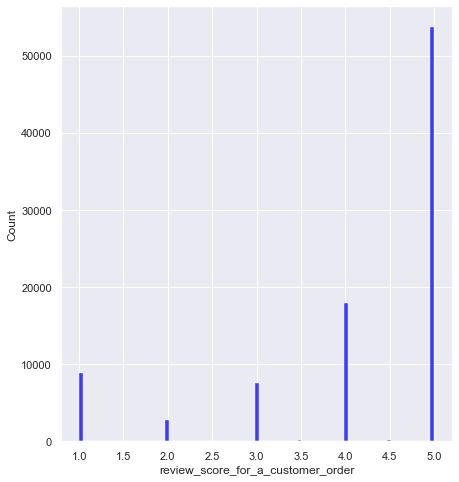

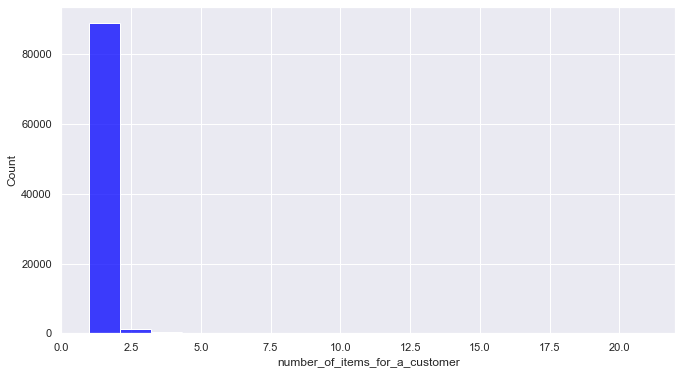

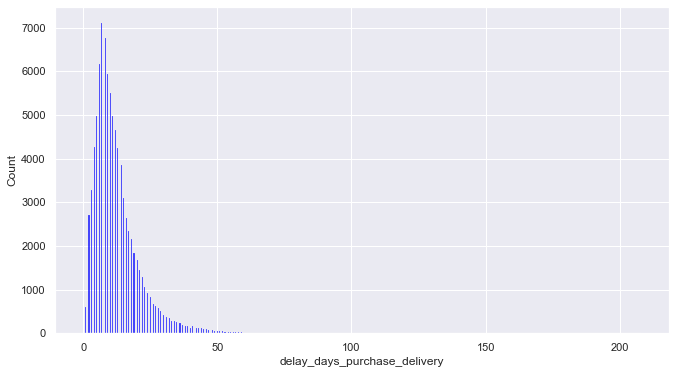

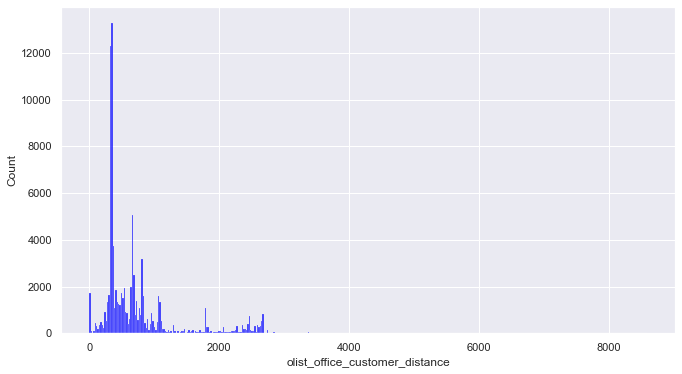

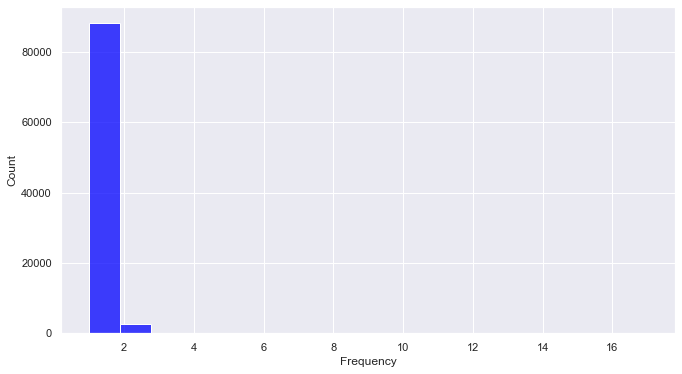

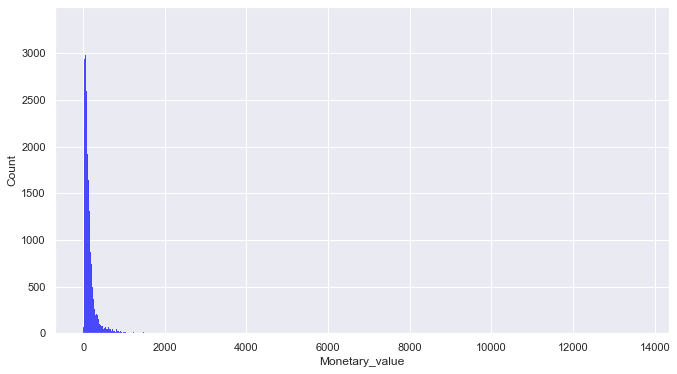

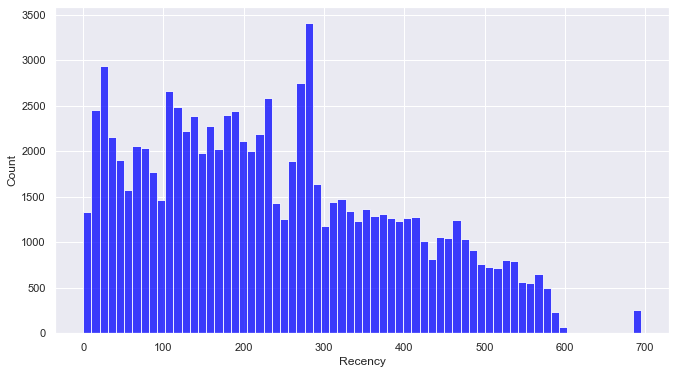

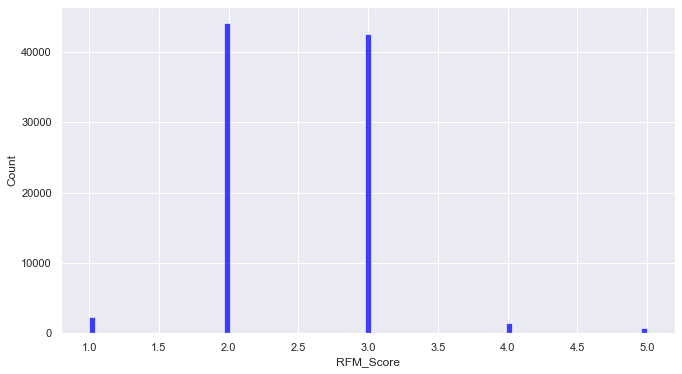

In [111]:
plt.subplots(figsize=(7, 8))

columns_histogram = automatic_segmentation_new_df.columns.tolist()
columns_histogram.remove('Segment_name')
columns_histogram.remove('customer_unique_id')
# columns_histogram.remove('RFM_Score')

for i in columns_histogram:
    sns.histplot(data = automatic_segmentation_new_df, x=i, color="blue")
    plt.show()

In [112]:
df_log_transformed = automatic_segmentation_new_df.copy()

In [113]:
columns_for_log_transformation = ['review_score_for_a_customer_order',
                                    'number_of_items_for_a_customer',
                                    'Frequency',
                                    'Monetary_value',
                                    'Recency',
                                    'delay_days_purchase_delivery',
                                    'olist_office_customer_distance']

In [114]:
for col in df_log_transformed.columns:
    if col in columns_for_log_transformation:
        df_log_transformed[col] = np.log10(df_log_transformed[col] + 0.1) 

In [115]:
# columns_histogram = df_log_transformed.columns.tolist()
# columns_histogram.remove('Segment_name')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_log_transformed, x=i, color="blue")
#     plt.show()

In [116]:
df_log_transformed.describe()

review_score_for_a_customer_order  number_of_items_for_a_customer  \
count                       91231.000000                    91231.000000   
mean                            0.594196                        0.075748   
std                             0.200911                        0.109224   
min                             0.041393                        0.041393   
25%                             0.612784                        0.041393   
50%                             0.707570                        0.041393   
75%                             0.707570                        0.041393   
max                             0.707570                        1.324282   

       delay_days_purchase_delivery  olist_office_customer_distance  \
count                  91231.000000                    91231.000000   
mean                       1.001773                        2.719506   
std                        0.296052                        0.396090   
min                       -1.000000                       -0.118249   
25%                        0.851258                        2.532751   
50%                        1.004321                        2.695412   
75%                        1.206826                        2.912959   
max                        2.318272                        3.934224   

          Frequency  Monetary_value       Recency     RFM_Score  
count  91231.000000    91231.000000  91231.000000  91231.000000  
mean       0.051051        2.028748      2.237942      2.500170  
std        0.054018        0.357493      0.416413      0.621298  
min        0.041393       -1.000000     -1.000000      1.000000  
25%        0.041393        1.786041      2.057286      2.000000  
50%        0.041393        2.013259      2.340642      2.000000  
75%        0.041393        2.243286      2.540455      3.000000  
max        1.232996        4.135581      2.842047      5.000000

#### Z-scores standardization

We are going to use Z-scores to detect outliers in our data, and to standardize it. See references: 

* https://www.mygreatlearning.com/blog/outlier-analysis-explained/
* https://www.codecademy.com/article/normalization
* https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [117]:
df_for_z_scores = df_log_transformed.copy()

In [118]:
columns_for_z_scores = df_for_z_scores.columns.tolist()
columns_for_z_scores.remove('Segment_name')
columns_for_z_scores.remove('customer_unique_id')
columns_for_z_scores.remove('RFM_Score')

for col in df_for_z_scores.columns:
    if col in columns_for_z_scores:
        # standardize data
        df_for_z_scores[col] = (df_for_z_scores[col] - df_for_z_scores[col].mean()) / df_for_z_scores[col].std()

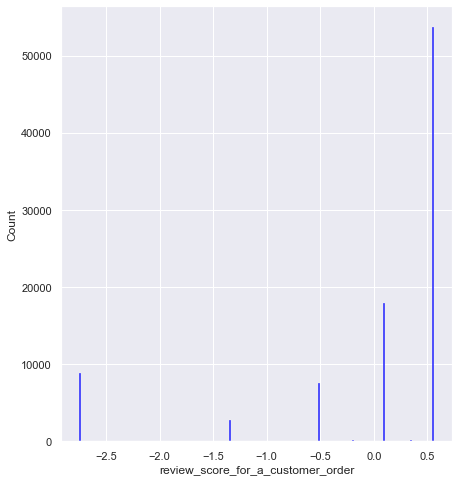

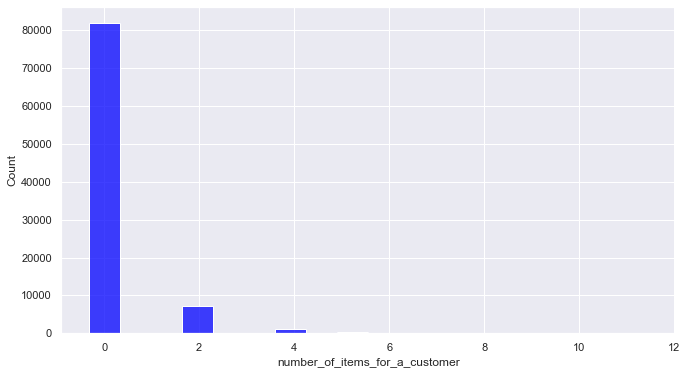

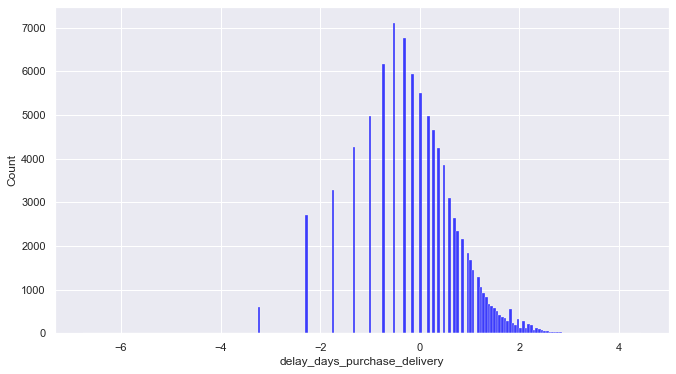

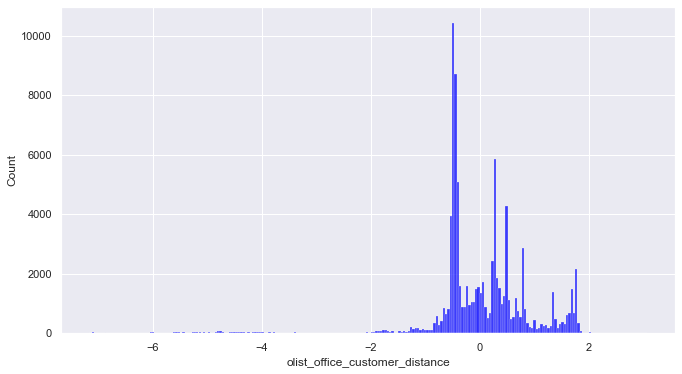

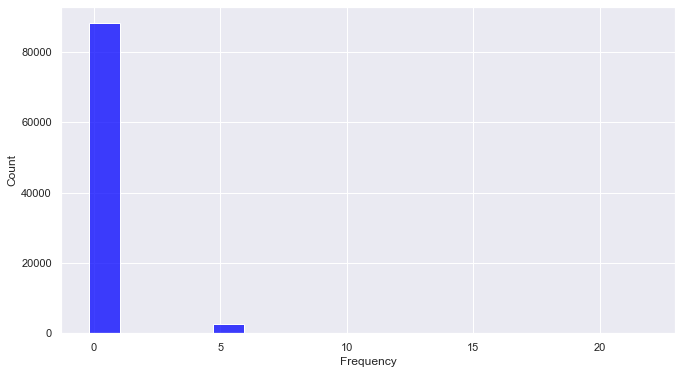

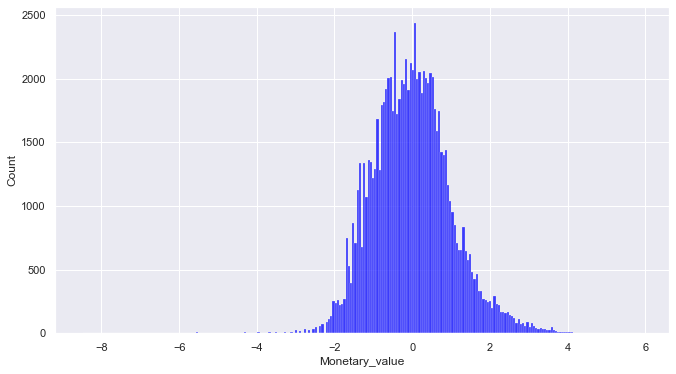

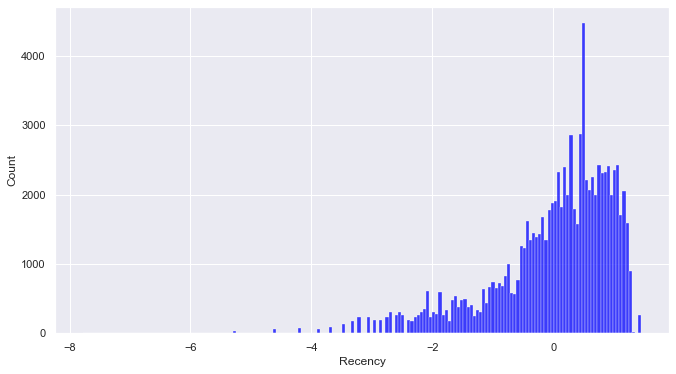

In [119]:
columns_histogram = df_for_z_scores.columns.tolist()
columns_histogram.remove('Segment_name')
columns_histogram.remove('customer_unique_id')
columns_histogram.remove('RFM_Score')

plt.subplots(figsize=(7, 8))
for i in columns_histogram:
    sns.histplot(data=df_for_z_scores, x=i, color="blue")
    plt.show()

In [120]:
df_standardized = df_for_z_scores.copy()

In [121]:
df_standardized_without_outliers = df_standardized.loc[(df_standardized['number_of_items_for_a_customer'] >= -4) & (df_standardized['number_of_items_for_a_customer'] <= 4)
                                                    & (df_standardized['Frequency'] >= -4) & (df_standardized['Frequency'] <= 4)
                                                    & (df_standardized['Monetary_value'] >= -4) & (df_standardized['Monetary_value'] <= 4)
                                                    & (df_standardized['Recency'] >= -4) & (df_standardized['Recency'] <= 4)
                                                    & (df_standardized['delay_days_purchase_delivery'] >= -4) & (df_standardized['delay_days_purchase_delivery'] <= 4)
                                                    & (df_standardized['olist_office_customer_distance'] >= -4) & (df_standardized['olist_office_customer_distance'] <= 4)]

In [122]:
# df_standardized_without_outliers = df_standardized.copy()

In [123]:
df_standardized_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85763 entries, 0 to 91230
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_unique_id                 85763 non-null  object 
 1   review_score_for_a_customer_order  85763 non-null  float64
 2   number_of_items_for_a_customer     85763 non-null  float64
 3   delay_days_purchase_delivery       85763 non-null  float64
 4   olist_office_customer_distance     85763 non-null  float64
 5   Segment_name                       85763 non-null  object 
 6   Frequency                          85763 non-null  float64
 7   Monetary_value                     85763 non-null  float64
 8   Recency                            85763 non-null  float64
 9   RFM_Score                          85763 non-null  float64
dtypes: float64(8), object(2)
memory usage: 7.2+ MB


In [124]:
# columns_histogram = df_standardized_without_outliers.columns.tolist()
# columns_histogram.remove('Customer_segment')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_standardized_without_outliers, x=i, color="blue")
#     plt.show()

In [125]:
# df_standardized_without_outliers.columns

### PCA for dimensionality reduction

#### Case 1: we eliminate the median of product type per customer features

We named this section Case 1, because in principle the idea was to explore the quality of clusterization by using and not using the median of product type per customer features. As we have decided NOT to use in this project such variables, we still let open the posibility to do it. In this sense, we would have:

Case 2: we keep the median of product type per customer features. 

In Case 1, we will keep then a smaller number of features that might be easier to interpret.

In [126]:
df_for_PCA_case_one = df_standardized_without_outliers.copy()

In [127]:
df_for_PCA_case_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85763 entries, 0 to 91230
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_unique_id                 85763 non-null  object 
 1   review_score_for_a_customer_order  85763 non-null  float64
 2   number_of_items_for_a_customer     85763 non-null  float64
 3   delay_days_purchase_delivery       85763 non-null  float64
 4   olist_office_customer_distance     85763 non-null  float64
 5   Segment_name                       85763 non-null  object 
 6   Frequency                          85763 non-null  float64
 7   Monetary_value                     85763 non-null  float64
 8   Recency                            85763 non-null  float64
 9   RFM_Score                          85763 non-null  float64
dtypes: float64(8), object(2)
memory usage: 7.2+ MB


In [128]:
df_for_PCA_case_one.head()

customer_unique_id  review_score_for_a_customer_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2                           0.564300   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                           0.092518   
2  0000f46a3911fa3c0805444483337064                          -0.511839   
3  0000f6ccb0745a6a4b88665a16c9f078                           0.092518   
4  0004aac84e0df4da2b147fca70cf8255                           0.564300   

   number_of_items_for_a_customer  delay_days_purchase_delivery  \
0                       -0.314543                     -0.731098   
1                       -0.314543                     -1.724060   
2                       -0.314543                      1.401335   
3                       -0.314543                      1.018144   
4                       -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency  RFM_Score  
0        0.346429 -0.461627        2.0  
1       -1.666547 -0.433839        2.0  
2       -0.262229  1.181793        3.0  
3       -1.075013  0.645270        3.0  
4        0.743898  0.532168        3.0

The following two cells are functions extracted from the Open Classrooms documentation from the course "Réalisez une analyse exploratoire de données". They are avaibale in GitHub, as indicated in their corresponding links.

The next cell contains a function that draws the correlation circles. The following correlation circles visualize the correlation between the first four principal components and the original dataset features. In such correlations  are shown via coordinates.
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/ 

In [30]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_circles(components_pca, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            ax = plt.subplots(figsize=(10,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif components_pca.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(components_pca[d1,:]), max(components_pca[d1,:]), min(components_pca[d2,:]), max(components_pca[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if components_pca.shape[1] < 30 :
                plt.quiver(np.zeros(components_pca.shape[1]), np.zeros(components_pca.shape[1]),
                   components_pca[d1,:], components_pca[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in components_pca[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(components_pca[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation circle (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

The next cell contains a function that draws the projected data into the factorial planes for the first four principal components.

In [130]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            plt.figure(figsize=(10,8))
        
            # affichage des points
            if illustrative_var is None:
                sns.scatterplot(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    sns.scatterplot(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projected data (on F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            # plt.colorbar()

In [131]:
from sklearn.decomposition import PCA
features = df_for_PCA_case_one.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).columns
names = df_for_PCA_case_one.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).index


# PCA
pca_case_one = PCA(n_components=7) # We start with the total number of features
pca_result_case_one = pca_case_one.fit_transform(df_for_PCA_case_one.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).values)
pca_result_case_one

array([[-9.93074239e-01,  5.20446466e-01, -3.01265775e-01, ...,
        -4.36894637e-01,  1.91803544e-01,  2.60310510e-17],
       [-2.08398223e+00, -6.91971840e-01,  1.09079223e+00, ...,
        -6.01251036e-03, -3.64603514e-01,  2.60310510e-17],
       [ 1.21814371e+00, -1.14587012e+00,  3.11506886e-02, ...,
        -4.45966909e-01,  1.18256237e+00,  2.60310510e-17],
       ...,
       [ 8.50800585e-01, -9.35990830e-01, -1.14657305e+00, ...,
         2.90281209e-01, -7.07590233e-01,  2.60310510e-17],
       [-7.03755079e-03,  2.59003248e-01, -4.49994369e-01, ...,
         1.06687994e-01, -1.32369087e-01,  2.60310510e-17],
       [-1.41449683e+00, -1.05797781e+00, -2.09521516e-01, ...,
        -1.32840811e+00,  2.85734584e+00,  2.60310510e-17]])

In [132]:
pca_result_case_one.shape

(85763, 7)

The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.

https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [133]:
(pca_case_one.explained_variance_ratio_ * 100).round(1)

array([28.5, 19.7, 17.9, 15.3, 10.6,  8. ,  0. ])

According to the previous result, the first component alone captures about 28.5% of the variability in the dataset. Then the second component alone captures about 19.7% of the variability in the dataset and so on. 

In [134]:
print("Variance explained by all 7 components = {:.2f}".format(sum(pca_case_one.explained_variance_ratio_ * 100)))

Variance explained by all 7 components = 100.00


Text(0, 0.5, 'Cumulative Explained Variance')

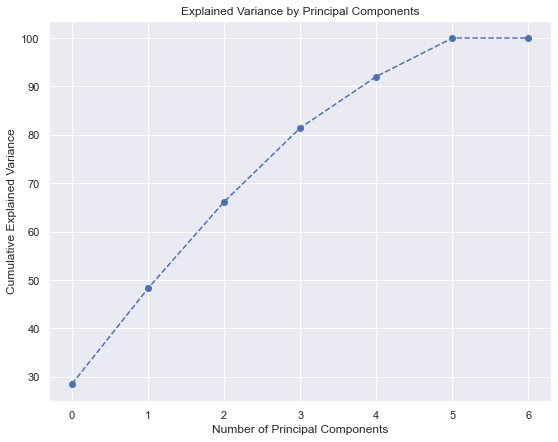

In [135]:
plt.subplots(figsize=(9, 7))
plt.plot(range(0,7),(pca_case_one.explained_variance_ratio_*100).cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 3 components.

##### Correlation circles visualization

By executing the function display_circles() we obtain the correlation circles.

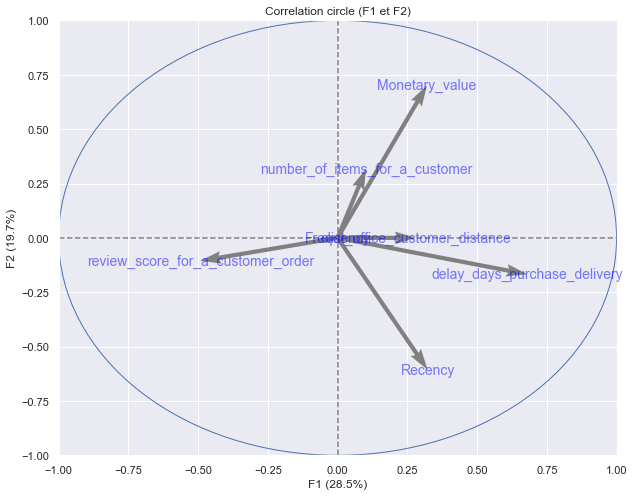

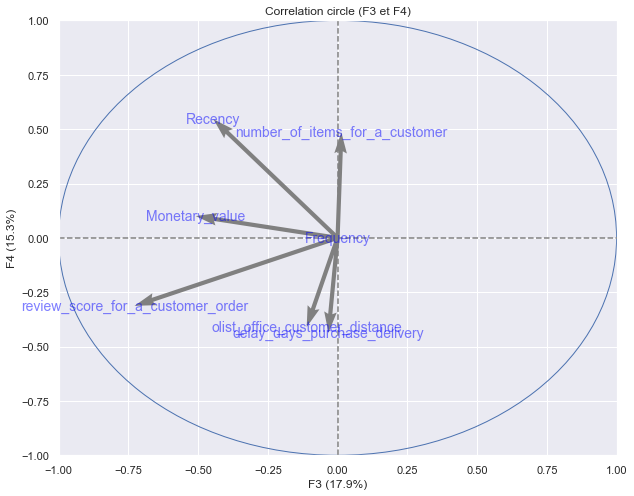

In [136]:
# Code extracted from OP example
# Cercle des corrélations
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
components_pca = pca_case_one.components_
display_circles(components_pca, 7, pca_case_one, [(0,1),(2,3)], labels = np.array(features))

##### Projected data visualization

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


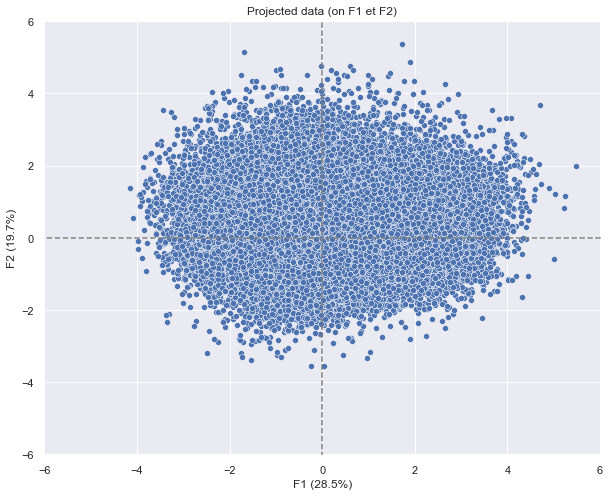

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


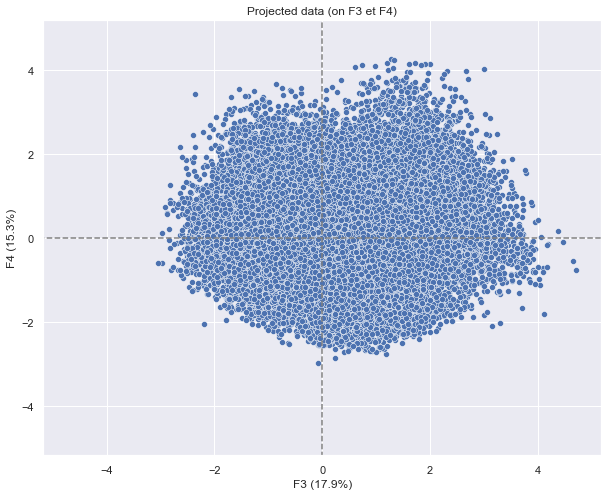

In [137]:
# Code extracted from OP example
# Projection des individus
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
X_projected = pca_result_case_one
display_factorial_planes(X_projected, 7, pca_case_one, [(0,1),(2,3)])

##### Projected data visualization by customer segment name

For a better visualization we are going to add some colors by label to the prjected data on the principal components.

In [138]:
df_for_PCA_case_one['F1'] = pca_result_case_one[:,0]
df_for_PCA_case_one['F2'] = pca_result_case_one[:,1]
df_for_PCA_case_one['F3'] = pca_result_case_one[:,2]
df_for_PCA_case_one['F4'] = pca_result_case_one[:,3]

In [139]:
df_for_PCA_case_one.head()

customer_unique_id  review_score_for_a_customer_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2                           0.564300   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                           0.092518   
2  0000f46a3911fa3c0805444483337064                          -0.511839   
3  0000f6ccb0745a6a4b88665a16c9f078                           0.092518   
4  0004aac84e0df4da2b147fca70cf8255                           0.564300   

   number_of_items_for_a_customer  delay_days_purchase_delivery  \
0                       -0.314543                     -0.731098   
1                       -0.314543                     -1.724060   
2                       -0.314543                      1.401335   
3                       -0.314543                      1.018144   
4                       -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency  RFM_Score        F1        F2        F3        F4  
0        0.346429 -0.461627        2.0 -0.993074  0.520446 -0.301266  0.036654  
1       -1.666547 -0.433839        2.0 -2.083982 -0.691972  1.090792  0.449223  
2       -0.262229  1.181793        3.0  1.218144 -1.145870  0.031151  0.428612  
3       -1.075013  0.645270        3.0  0.963221 -1.390278 -0.034989 -1.045489  
4        0.743898  0.532168        3.0  0.158793  0.008981 -0.959382  0.214313

Text(0.5, 1.0, 'PCA analysis')

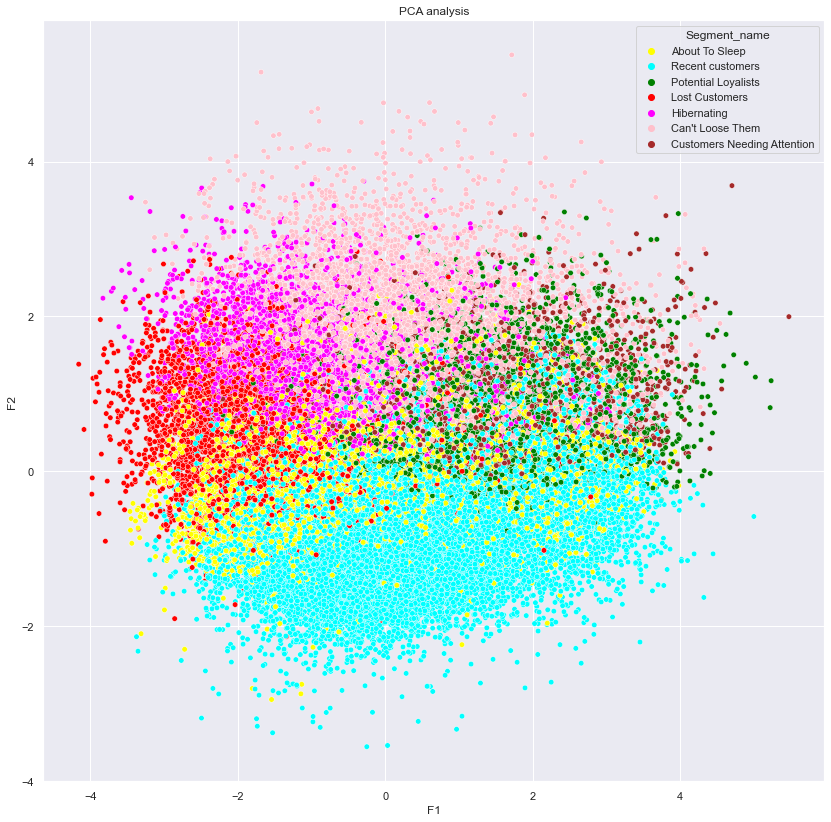

In [140]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F1", y="F2", hue="Segment_name", data=df_for_PCA_case_one, palette=my_pal, s=30)
plt.title('PCA analysis')

Text(0.5, 1.0, 'PCA analysis')

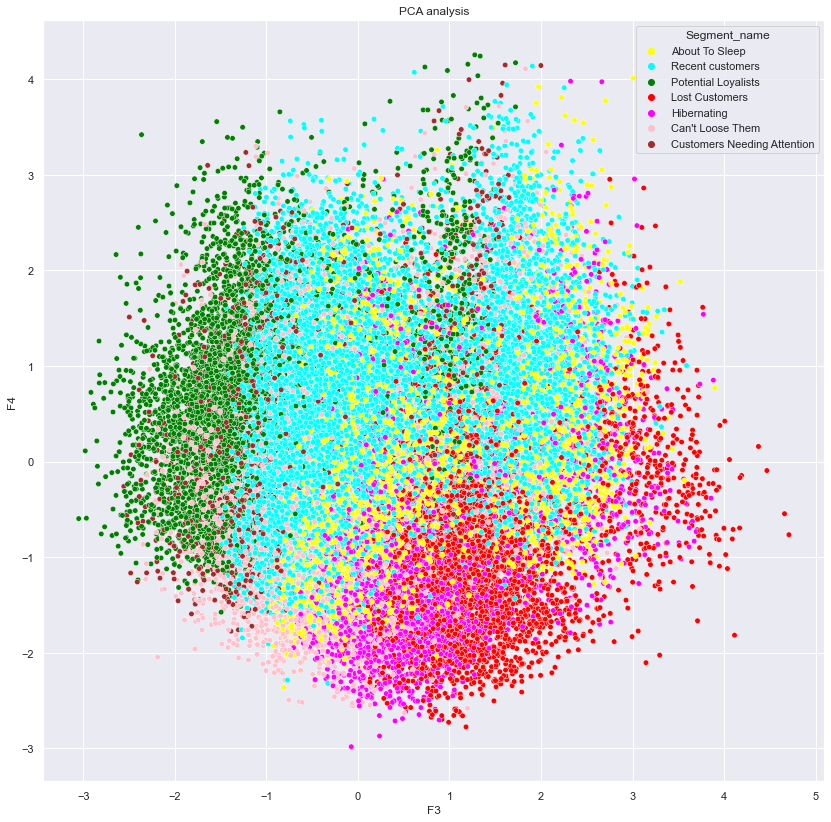

In [141]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F3", y="F4", hue="Segment_name", data=df_for_PCA_case_one, palette=my_pal, s=30)
plt.title('PCA analysis')

### K-means clusterization

We will start by importing the necessary modules for K-means clusterization. 

In [142]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

We will produce a new dataframe which we will use for K-means analysis.

In [215]:
df_k_means_reduced_PCA = df_for_PCA_case_one.copy()

In [216]:
df_k_means_reduced_PCA.columns

Index(['customer_unique_id', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'RFM_Score', 'F1', 'F2', 'F3', 'F4'],
      dtype='object')

We need to find the best parameters for the K-means clusterer, and the way to go is using either the silhouette method or the elbow method. We will test both method for comparison.

#### Silhouette method: determining the best K number of clusters

**The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).**

Then we select a range of values of K and we plot the silhouette coefﬁcient for each value of K.

Points to remember while calculating silhouette coefficient:

* The value of the silhouette coefﬁcient is between [-1, 1].
* A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
* The worst value is -1. Values near 0 denote overlapping clusters.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=Silhouette%20analysis,for%20each%20value%20of%20K.

In [217]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans_clusterer_silhouette = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_clusterer_silhouette.fit(df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)
    cluster_labels = kmeans_clusterer_silhouette.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values, cluster_labels))

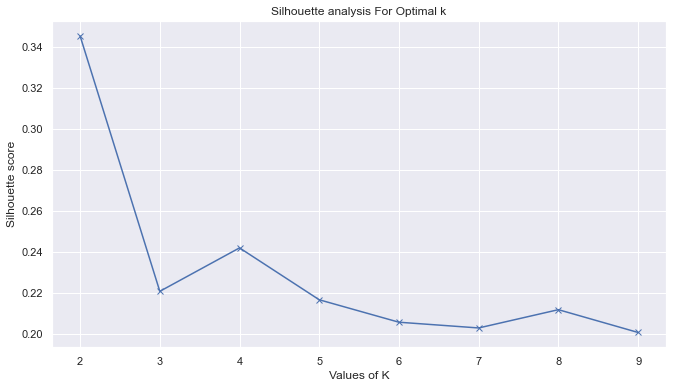

In [218]:
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

#### Elbow method: determining the best K number of clusters

The elbow method runs K-means clustering on the dataset for a range of values of K. It performs K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points. Then the idea is to plot these points corresponding to the number of the K cluster. Then we need to find the point where the average distance from the centroid falls suddenly (Elbow-shaped).

See reference: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=Silhouette%20analysis,for%20each%20value%20of%20K

In [145]:
Sum_of_squared_distances_kmeans_clusterer_elbow = []
K = range(1,20) # Range of clusters to find the best fit

for k in K:
    k_means_clusterer_elbow = KMeans(n_clusters=k, random_state=42)
    k_means_clusterer_elbow = k_means_clusterer_elbow.fit(df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)
    Sum_of_squared_distances_kmeans_clusterer_elbow.append(k_means_clusterer_elbow.inertia_)

For the visualization of the elbow method of our K-Means clusterer, we have:

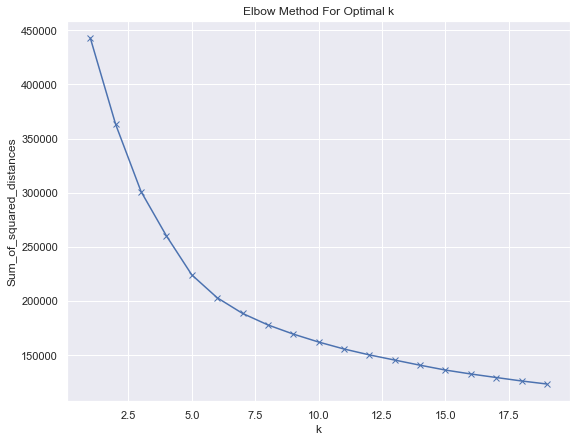

In [146]:
plt.subplots(figsize=(9, 7))
plt.plot(K, Sum_of_squared_distances_kmeans_clusterer_elbow, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As the number of clusters increases, the variance (within-cluster sum of squares) decreases. Hence there is a point when the decrease os thr sum of squared distances is not significant for increasing k-cluster value. That’s how we get the optimal value of k.

As observed, we tested to methods to find the optimal number of clusters to run the K-means algorith. We found in the silhouette method an optimal number of clusters equal to 4, and from elbow method, we obtained an optimal number of 5 clusters. We will keep 5 as the number of clusters for the K-means clusterer, in accordance with the elbow method.

In [226]:
clusterer_k_means_with_elbow_result = KMeans(n_clusters=5, random_state=42)

#Predict the labels of clusters
cluster_labels_with_elbow_result = clusterer_k_means_with_elbow_result.fit_predict(df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

In [227]:
df_k_means_reduced_PCA['Segment_k_means_label'] = cluster_labels_with_elbow_result

In [228]:
df_k_means_reduced_PCA.head()

customer_unique_id  review_score_for_a_customer_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2                           0.564300   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                           0.092518   
2  0000f46a3911fa3c0805444483337064                          -0.511839   
3  0000f6ccb0745a6a4b88665a16c9f078                           0.092518   
4  0004aac84e0df4da2b147fca70cf8255                           0.564300   

   number_of_items_for_a_customer  delay_days_purchase_delivery  \
0                       -0.314543                     -0.731098   
1                       -0.314543                     -1.724060   
2                       -0.314543                      1.401335   
3                       -0.314543                      1.018144   
4                       -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency  RFM_Score        F1        F2        F3  \
0        0.346429 -0.461627        2.0 -0.993074  0.520446 -0.301266   
1       -1.666547 -0.433839        2.0 -2.083982 -0.691972  1.090792   
2       -0.262229  1.181793        3.0  1.218144 -1.145870  0.031151   
3       -1.075013  0.645270        3.0  0.963221 -1.390278 -0.034989   
4        0.743898  0.532168        3.0  0.158793  0.008981 -0.959382   

         F4  Segment_k_means_label  
0  0.036654                      1  
1  0.449223                      3  
2  0.428612                      0  
3 -1.045489                      0  
4  0.214313                      0

We can get also the centroids of each cluster.

In [229]:
# Getting the Centroids of the clusters
centroids = clusterer_k_means_with_elbow_result.cluster_centers_
unique_labels = np.unique(cluster_labels_with_elbow_result)

We then visualize the clusterization from K-means, using the first four principal components obtained from the PCA analysis. 

Text(0.5, 1.0, 'Clusters by Principal Components')

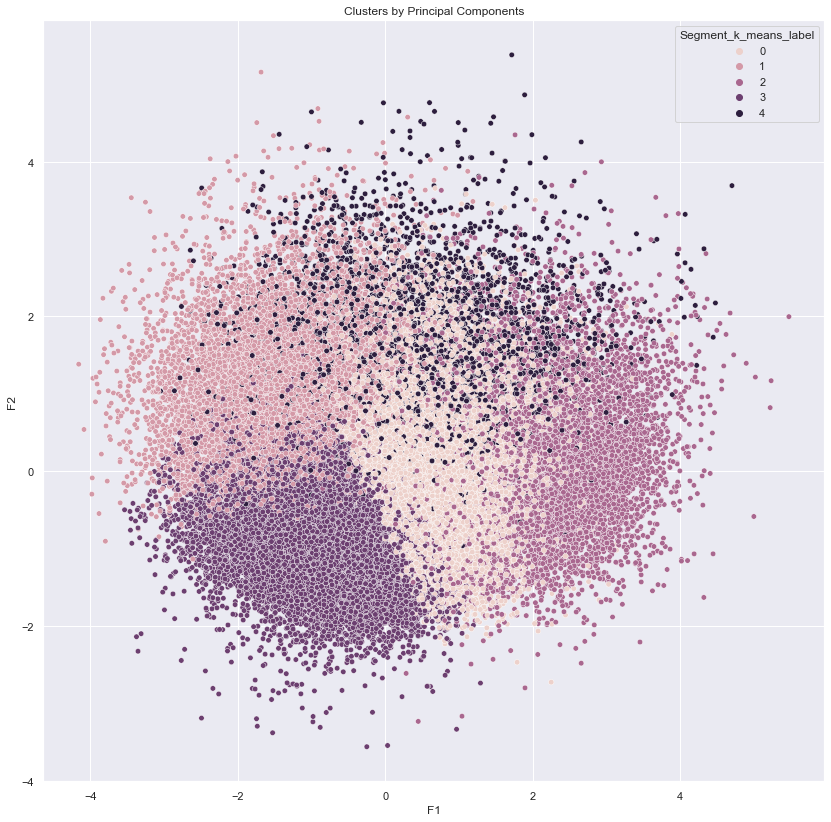

In [230]:
plt.show()
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_k_means_reduced_PCA['F1'], y = df_k_means_reduced_PCA['F2'], hue = df_k_means_reduced_PCA['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')

Text(0.5, 1.0, 'Clusters by Principal Components')

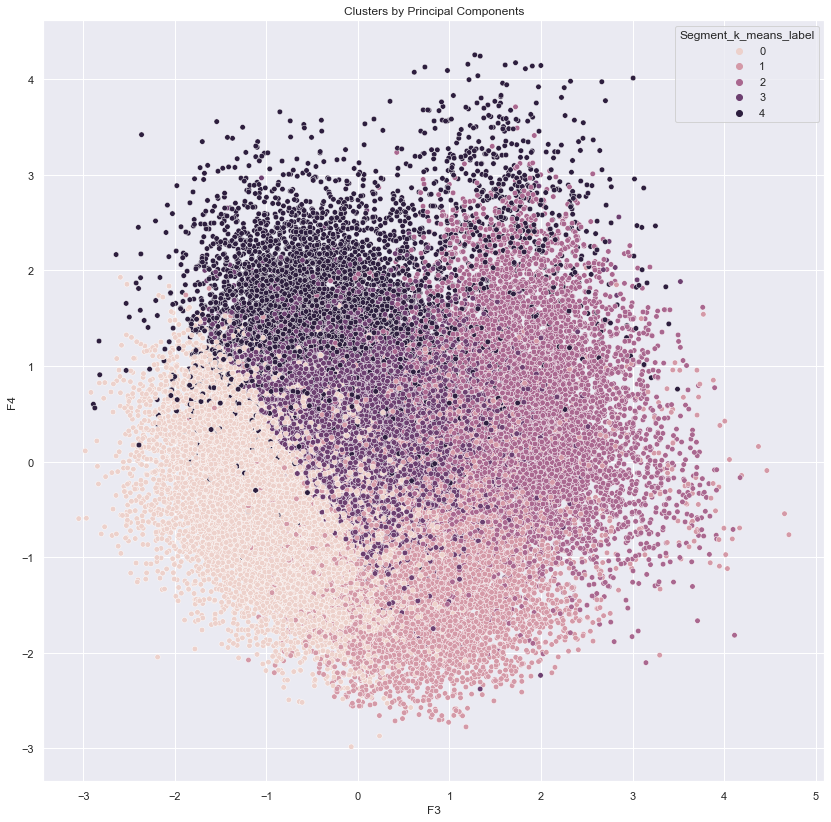

In [231]:
plt.show()
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_k_means_reduced_PCA['F3'], y = df_k_means_reduced_PCA['F4'], hue = df_k_means_reduced_PCA['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')

We observed that K-means clusterer asigned five labels to the data points (each label corresponding to a cluster). Next, the idea is to give some significance to the groups formed by K-means.

### Interpretation of automatic segmentation

We will create a dataframe that will contain the statistics for each group of labels created from K-means. For this we will perform a merge between the dataframe that we have used for the K-means clusterization and the previously obtained dataframe from RFM segmentation. We can perform this merge by customer_unique_id. 

In fact, this will be helpful to asign after the customer segment names to each label.

In [232]:
df_k_means_reduced_PCA.columns

Index(['customer_unique_id', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'RFM_Score', 'F1', 'F2', 'F3', 'F4',
       'Segment_k_means_label'],
      dtype='object')

In [233]:
new_df_k_means_reduced_PCA = df_k_means_reduced_PCA.copy()

new_df_k_means_reduced_PCA = new_df_k_means_reduced_PCA.drop(columns=['review_score_for_a_customer_order',
                                                                      'number_of_items_for_a_customer', 
                                                                      'delay_days_purchase_delivery',
                                                                      'olist_office_customer_distance', 
                                                                      'Segment_name', 
                                                                      'RFM_Score', 
                                                                      'Frequency',
                                                                      'Monetary_value', 
                                                                      'Recency', 
                                                                      'F1', 
                                                                      'F2', 
                                                                      'F3', 
                                                                      'F4'])

df_merge_segmentation_interpretation = new_df_k_means_reduced_PCA.copy()

df_merge_segmentation_interpretation = df_merge_segmentation_interpretation.merge(automatic_segmentation_new_df, on='customer_unique_id', how='left') 

In [234]:
df_merge_segmentation_interpretation.columns

Index(['customer_unique_id', 'Segment_k_means_label',
       'review_score_for_a_customer_order', 'number_of_items_for_a_customer',
       'delay_days_purchase_delivery', 'olist_office_customer_distance',
       'Segment_name', 'Frequency', 'Monetary_value', 'Recency', 'RFM_Score'],
      dtype='object')

In [235]:
df_merge_segmentation_interpretation = df_merge_segmentation_interpretation.drop(columns=['customer_unique_id',
                                                                                           'Segment_name',
                                                                                           'RFM_Score'])
       
df_merge_segmentation_interpretation.head()

df_stats_segmentation = df_merge_segmentation_interpretation.copy()

In [236]:
df_stats_segmentation.columns

Index(['Segment_k_means_label', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Frequency', 'Monetary_value',
       'Recency'],
      dtype='object')

In [237]:
df_stats_segmentation = df_stats_segmentation.groupby('Segment_k_means_label')[['Frequency', 
                                                                                'Monetary_value', 
                                                                                'Recency', 
                                                                                'review_score_for_a_customer_order', 
                                                                                'number_of_items_for_a_customer',
                                                                                'delay_days_purchase_delivery', 
                                                                                'olist_office_customer_distance']].agg([np.mean])

new_df_stats_segmentation = df_stats_segmentation.copy()

new_df_stats_segmentation["size"] = df_merge_segmentation_interpretation.groupby('Segment_k_means_label')[['Recency']].agg([np.size]) 

new_df_stats_segmentation.round(1).head()

Frequency Monetary_value Recency  \
                           mean           mean    mean   
Segment_k_means_label                                    
0                           1.0          223.4   275.4   
1                           1.0          141.2    45.6   
2                           1.0          167.3   242.6   
3                           1.0           71.4   290.4   
4                           1.0          223.6   243.1   

                      review_score_for_a_customer_order  \
                                                   mean   
Segment_k_means_label                                     
0                                                   4.5   
1                                                   4.6   
2                                                   1.2   
3                                                   4.6   
4                                                   4.1   

                      number_of_items_for_a_customer  \
                                                mean   
Segment_k_means_label                                  
0                                                1.0   
1                                                1.0   
2                                                1.1   
3                                                1.0   
4                                                2.2   

                      delay_days_purchase_delivery  \
                                              mean   
Segment_k_means_label                                
0                                             16.3   
1                                              7.1   
2                                             22.6   
3                                              8.5   
4                                             10.9   

                      olist_office_customer_distance   size  
                                                mean         
Segment_k_means_label                                        
0                                             1031.7  27911  
1                                              616.9  13761  
2                                              848.5   9038  
3                                              474.8  28620  
4                                              674.3   6433

In order to asign customer segment names to the labels obtained from K-means, we will connect first the detailed segmentation obtained from RFM with the main five groups obtained before from the heuristic RFM method. This is:

* **Top customer:** Potential Loyalists (0)
* **High value customer:** Customers Needing Attention (4)
* **Medium value customer:** Recent customers (3)
* **Low-value customer:** About To Sleep, Can't Loose Them (2)
* **Lost customer:** Lost Customers, Hibernating (1)

We have the behavior for each client subsegment:

* **Potential Loyalists:** Recent customers with average frequency.
* **Customers Needing Attention:** Above average recency, frequency and monetary values. May not have bought very recently though.
* **Recent Customers:** Bought most recently, but not often.
* **Can't Lose Them:** Used to purchase frequently but haven't returned for a long time.
* **About To Sleep:** Below average recency and frequency. Will lose them if not reactivated.
* **Hibernating:** Last purchase was long back and low number of orders.
* **Lost Customers:** Purchased long time ago and never came back.

We will then asign each label obtained from K-means to the five main groups obtained from the RFM heuristic method.

In [238]:
df_k_means_reduced_PCA['Segment_client_k_means'] = \
    df_k_means_reduced_PCA['Segment_k_means_label'].map({
        0: 'Top customer: Potential Loyalists', # High recency and high monetary value. Recent customers.
        4: 'High value customer: Customers Needing Attention', # High recency and high monetary value. May not have placed purchase very recently.
        3: 'Medium value customer: Recent customers', # Highest recency
        2: 'Low-value customer: About To Sleep, Can\'t Loose Them', # Not so high recency. Haven't returned for a while.
        1: 'Lost customer: Lost Customers, Hibernating' # Low Recency and low monetary value
        })

We plot the data points with the corresponding customer segment names.

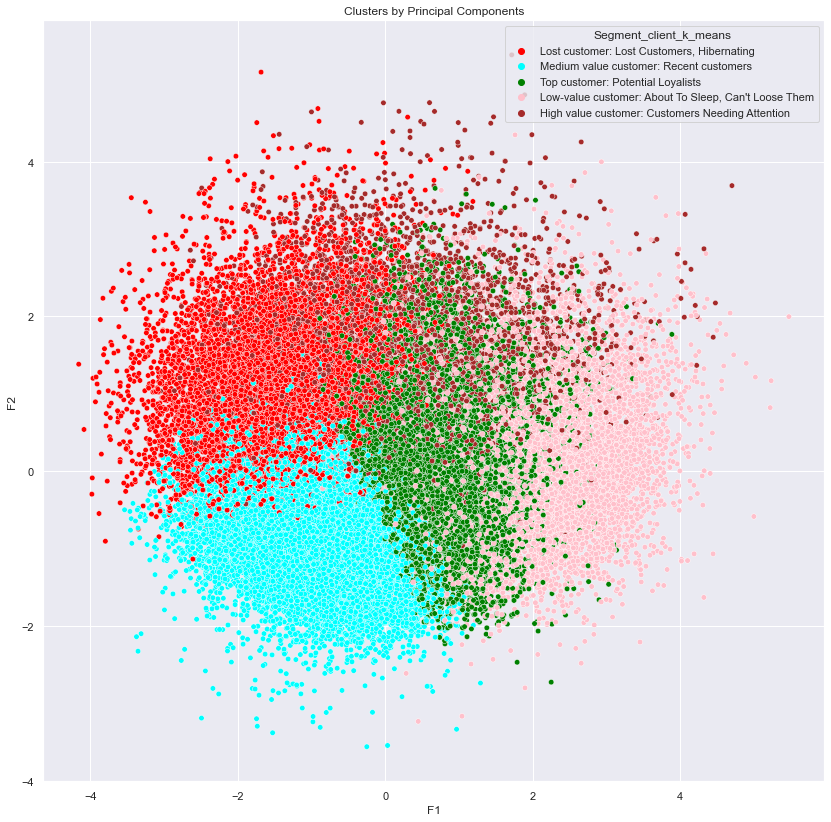

In [239]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost customer: Lost Customers, Hibernating":"red",
           "Low-value customer: About To Sleep, Can\'t Loose Them":"pink",
           "High value customer: Customers Needing Attention":"brown",
           "Medium value customer: Recent customers":"cyan",
           "Top customer: Potential Loyalists":"green"}
sns.scatterplot(x = df_k_means_reduced_PCA['F1'], y = df_k_means_reduced_PCA['F2'], hue = df_k_means_reduced_PCA['Segment_client_k_means'], palette=my_pal, s = 30)
plt.title('Clusters by Principal Components')
plt.show()

We will now add three more columns corresponding to the customer segments (and subsegments for a better understanding o their behavior) and a description. We keep the following order.

* **Top customer:** Potential Loyalists (0) **-->** 'Recent customers with high monetary value.'
* **High value customer:** Customers Needing Attention (4) **-->** 'Above average recency and monetary values. May not have bought very recently though.'
* **Medium value customer:** Recent customers (3) **-->** 'Bought most recently, but not often.'
* **Low-value customer:** About To Sleep, Can't Loose Them (2) **-->** 'Below average recency (will lose them if not reactivated). Also used to purchase frequently but haven\'t returned for a long time.'
* **Lost customer:** Lost Customers, Hibernating (1) **-->** 'Purchased long time ago and never came back. Also last purchase was long back and low number of orders.'

In [240]:
new_df_stats_segmentation['Client_segment'] = ['Top customer', # (0) High recency and high monetary value. Recent customers.
                                                'Lost customer', # (1) Low Recency and low monetary value
                                                'Low-value customer', # (2) Not so high recency. Haven't returned for a while.
                                                'Medium value customer', # (3) Highest recency.
                                                'High value customer' # (4) High recency and high monetary value. May not have placed purchase very recently.
                                                ]
                                                
new_df_stats_segmentation['Client_subsegment'] = ['Potential Loyalists', # (0) High recency and high monetary value. Recent customers.
                                                    'Lost Customers, Hibernating', # (1) Low Recency and low monetary value.
                                                    'About To Sleep, Can\'t Loose Them', # (2) Not so high recency. Haven't returned for a while.
                                                    'Recent customers', # (3) Highest recency.
                                                    'Customers Needing Attention' # (4) High recency and high monetary value. May not have placed purchase very recently.    
                                                    ]
                                                
new_df_stats_segmentation['Description'] = ['Recent customers with high monetary value.', # (0) 'Top customer'
                                            'Purchased long time ago and never came back. Also last purchase was long back and low number of orders.', # (1) 'Lost customer'
                                            'Below average recency (will lose them if not reactivated). Also used to purchase frequently but haven\'t returned for a long time.', # (2) 'Low-value customer'
                                            'Bought most recently, but not often.', # (3) 'Medium value customer'
                                            'Above average recency and monetary values. May not have bought very recently though.' # (4) 'High value customer'
                                            ]

In [241]:
new_df_stats_segmentation.round(0).drop(columns=['review_score_for_a_customer_order',
                                                    'number_of_items_for_a_customer',
                                                    'delay_days_purchase_delivery',
                                                    'olist_office_customer_distance']).head()

Frequency Monetary_value Recency   size  \
                           mean           mean    mean          
Segment_k_means_label                                           
0                           1.0          223.0   275.0  27911   
1                           1.0          141.0    46.0  13761   
2                           1.0          167.0   243.0   9038   
3                           1.0           71.0   290.0  28620   
4                           1.0          224.0   243.0   6433   

                              Client_segment  \
                                               
Segment_k_means_label                          
0                               Top customer   
1                              Lost customer   
2                         Low-value customer   
3                      Medium value customer   
4                        High value customer   

                                      Client_subsegment  \
                                                          
Segment_k_means_label                                     
0                                   Potential Loyalists   
1                           Lost Customers, Hibernating   
2                      About To Sleep, Can't Loose Them   
3                                      Recent customers   
4                           Customers Needing Attention   

                                                             Description  
                                                                          
Segment_k_means_label                                                     
0                             Recent customers with high monetary value.  
1                      Purchased long time ago and never came back. A...  
2                      Below average recency (will lose them if not r...  
3                                   Bought most recently, but not often.  
4                      Above average recency and monetary values. May...

In [242]:
new_df_stats_segmentation.round(0).drop(columns=['Client_subsegment',
                                                    'Description']).head()

Frequency Monetary_value Recency  \
                           mean           mean    mean   
Segment_k_means_label                                    
0                           1.0          223.0   275.0   
1                           1.0          141.0    46.0   
2                           1.0          167.0   243.0   
3                           1.0           71.0   290.0   
4                           1.0          224.0   243.0   

                      review_score_for_a_customer_order  \
                                                   mean   
Segment_k_means_label                                     
0                                                   5.0   
1                                                   5.0   
2                                                   1.0   
3                                                   5.0   
4                                                   4.0   

                      number_of_items_for_a_customer  \
                                                mean   
Segment_k_means_label                                  
0                                                1.0   
1                                                1.0   
2                                                1.0   
3                                                1.0   
4                                                2.0   

                      delay_days_purchase_delivery  \
                                              mean   
Segment_k_means_label                                
0                                             16.0   
1                                              7.0   
2                                             23.0   
3                                              9.0   
4                                             11.0   

                      olist_office_customer_distance   size  \
                                                mean          
Segment_k_means_label                                         
0                                             1032.0  27911   
1                                              617.0  13761   
2                                              848.0   9038   
3                                              475.0  28620   
4                                              674.0   6433   

                              Client_segment  
                                              
Segment_k_means_label                         
0                               Top customer  
1                              Lost customer  
2                         Low-value customer  
3                      Medium value customer  
4                        High value customer

### DBSCAN algorithm

We will now test the DBSCAN algorithm. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning technique used to identify clusters of varying shape in a dataset.

The advantages of DBSCAN over other clustering algorithms are:

* DBSCAN does not require a pre-determined set number of clusters.
* DBSCAN identifies outliers as noise, instead of classifying them into a cluster.
* DBSCAN is more flexible when it comes to the size and shape of clusters than other partitioning methods, such as K-means. It is able to identify clusters that differ in size and shape from one another, which makes it more useful for messy data.

See reference:

https://medium.com/@tarammullin/dbscan-2788cfce9389

In [243]:
from sklearn.cluster import DBSCAN

We will create a dataframe that we can manipulate after for DBSCAN analysis.

In [244]:
df_dbscan_reduced_PCA = df_for_PCA_case_one.copy()

#### DBSCAN Parameter Estimation:

https://medium.com/@tarammullin/dbscan-2788cfce9389

DBSCAN’s two parameters are: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

* Minimum samples ('MinPts'): the fewest number of points required to form a cluster. MinPts value should be set using domain knowledge and familiarity with the dataset. The larger the dataset, the larger the value of MinPts should be. If the data set is noisier, we need to choose a larger value of MinPts. Generally, MinPts should be greater than or equal to the dimensionality of the data set. For 2-dimensional data, we should use DBSCAN’s default value of MinPts = 4. If the data has more than 2 dimensions, we should choose MinPts=2*dim, where dim=the_dimensions_of_dataset. In our case, we have 7 features, which means MinPts = 14.

* ε (epsilon or 'eps'): the maximum distance two points can be from one another while still belonging to the same cluster. To determine eps parameter we can use NearestNeighbors from Scikit-learn, to calculate the average distance between each point and its n_neighbors. This technique calculates the average distance between each point and its k nearest neighbors. The average k-distances are then plotted in ascending order on a k-distance graph. We will find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

See also reference: https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan#:~:text=Sort%20the%20distances%20in%20the,'elbow'%20as%20optimal%20eps.

In [245]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)

neighbors_fit = neighbors.fit(df_dbscan_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

distances, indices = neighbors_fit.kneighbors(df_dbscan_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

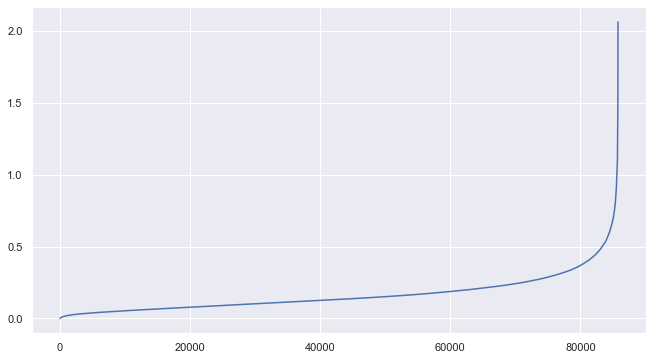

In [246]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [271]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

# We can try with 0.8, 1, 1.5, where some clusters where observed. min_samples => 14. min_samples = 20 worked fine

dbscan_clusterer = DBSCAN(eps = 1.5, min_samples = 30).fit(df_dbscan_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)
labels_db_scan = dbscan_clusterer.labels_

We will now visualize the clusterization from DBSCAN algorithm using the four two principal components obtained from PCA analysis.

In [272]:
df_dbscan_reduced_PCA['Segment_dbscan_label'] = labels_db_scan

In [273]:
df_dbscan_reduced_PCA.head()

customer_unique_id  review_score_for_a_customer_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2                           0.564300   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                           0.092518   
2  0000f46a3911fa3c0805444483337064                          -0.511839   
3  0000f6ccb0745a6a4b88665a16c9f078                           0.092518   
4  0004aac84e0df4da2b147fca70cf8255                           0.564300   

   number_of_items_for_a_customer  delay_days_purchase_delivery  \
0                       -0.314543                     -0.731098   
1                       -0.314543                     -1.724060   
2                       -0.314543                      1.401335   
3                       -0.314543                      1.018144   
4                       -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency  RFM_Score        F1        F2        F3  \
0        0.346429 -0.461627        2.0 -0.993074  0.520446 -0.301266   
1       -1.666547 -0.433839        2.0 -2.083982 -0.691972  1.090792   
2       -0.262229  1.181793        3.0  1.218144 -1.145870  0.031151   
3       -1.075013  0.645270        3.0  0.963221 -1.390278 -0.034989   
4        0.743898  0.532168        3.0  0.158793  0.008981 -0.959382   

         F4  Segment_dbscan_label  
0  0.036654                     0  
1  0.449223                     0  
2  0.428612                     0  
3 -1.045489                     0  
4  0.214313                     0

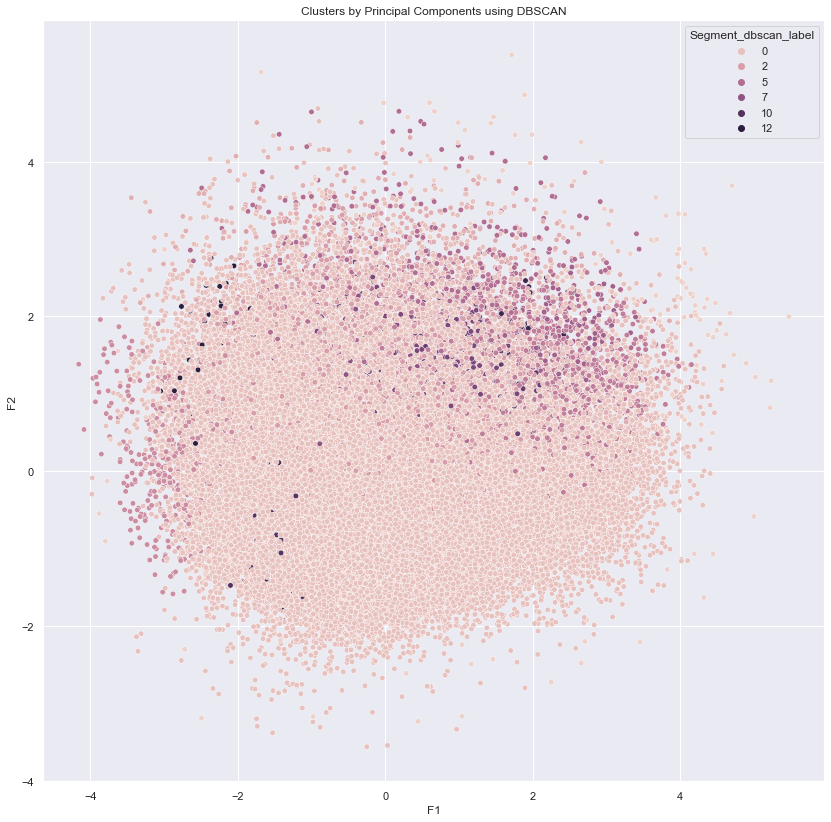

In [274]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_dbscan_reduced_PCA['F1'], y = df_dbscan_reduced_PCA['F2'], hue = df_dbscan_reduced_PCA['Segment_dbscan_label'], s = 30)
plt.title('Clusters by Principal Components using DBSCAN')
plt.show()

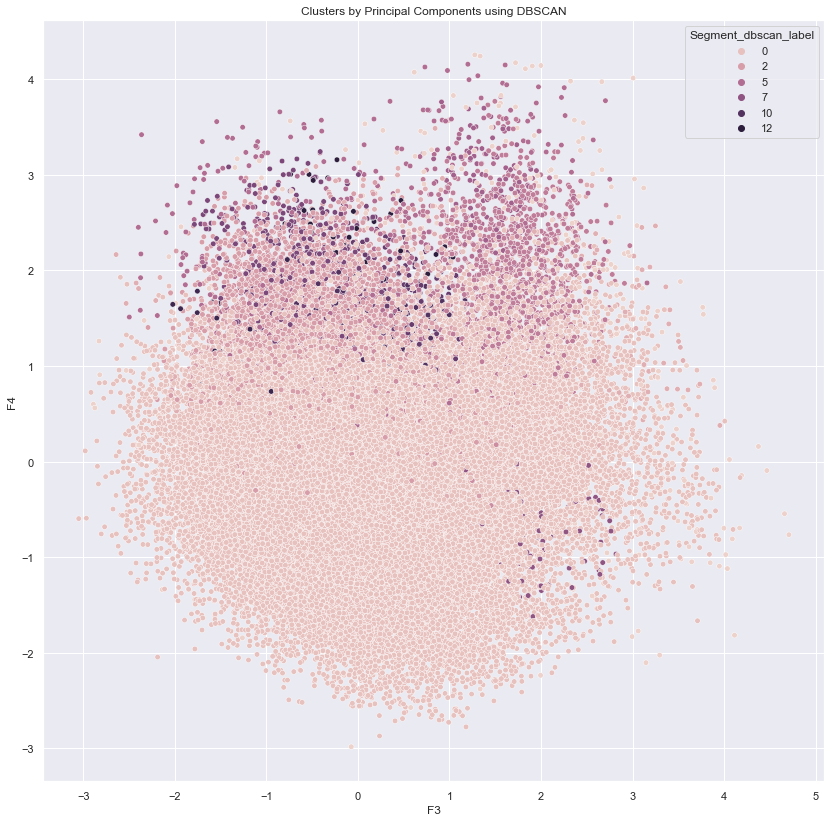

In [275]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_dbscan_reduced_PCA['F3'], y = df_dbscan_reduced_PCA['F4'], hue = df_dbscan_reduced_PCA['Segment_dbscan_label'], s = 30)
plt.title('Clusters by Principal Components using DBSCAN')
plt.show()

In [276]:
df_dbscan_reduced_PCA['Segment_dbscan_label'].unique()

array([ 0,  1,  2,  3,  4,  5, -1,  6,  7,  8,  9, 12, 10, 11],
      dtype=int64)

Comments to discuss with Dan:

* La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

* **Dans un deuxième temps, une fois le modèle de segmentation choisi, nous souhaiterions  que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.**

* Pour information, le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

### TSNE TEST - WILL NOT USE

In [ ]:
# #TSNE 

# from sklearn.manifold import TSNE


In [ ]:
# df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'F1', 'F2', 'F3', 'F4','Segment_client_k_means', 'Segment_k_means_label']).head()

In [ ]:
# tsne = TSNE(verbose=1, random_state=42, perplexity=70)
# tsne_result = tsne.fit_transform(df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'F1', 'F2', 'F3', 'F4','Segment_client_k_means', 'Segment_k_means_label']).values) 

In [ ]:
# tsne_result

In [ ]:
# df = pd.DataFrame()
# df["y"] = df_k_means_reduced_PCA['Segment_name']
# df["comp-1"] = tsne_result[:,0]
# df["comp-2"] = tsne_result[:,1]

# sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
#                 # palette=my_pal,
#                 # palette=sns.color_palette("hls", 3),
#                 data=df).set(title="Data T-SNE projection")